# This program records the audio from the selected input, filters it and then plays it back.

### Input: 
The input is the recorded audio whenever the program is run for 8 seconds. The program processes it block wise and then filters it with a bandpass filter(designed using remez from scipy.signal) and stores it for for output.

### Output:
Plays back the filtered version of the sound recorded in real-time.

### Import relevant modules and define the variables.

In [1]:
import pyaudio
import struct
import math
#import array
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

CHUNK = 1024 #Blocksize
WIDTH = 2 #2 bytes per sample
CHANNELS = 1 #2
RATE = 8000  #Sampling Rate in Hz
RECORD_SECONDS = 8

### Design the filter with the given properties.

In [2]:
N=32
bpass=scipy.signal.remez(N, [0.0, 0.05, 0.1, 0.2, 0.3, 0.5]  , [0.0, 1.0, 0.0], weight=[1.0, 1.0, 1.0])

### Plotting the frequency response.

c:\python27\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


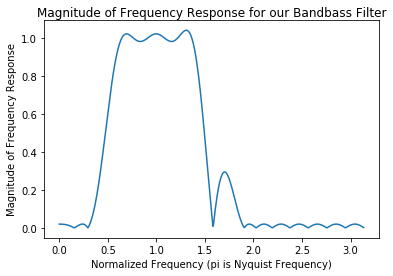

In [3]:
fig = plt.figure()
[freq, response] = scipy.signal.freqz(bpass)
plt.plot(freq, np.abs(response))
plt.xlabel('Normalized Frequency (pi is Nyquist Frequency)')
plt.ylabel("Magnitude of Frequency Response")
plt.title("Magnitude of Frequency Response for our Bandbass Filter") 
fig.show()

### Record the audio to be filtered and play it back.

In [4]:
p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                #input_device_index=10,
                frames_per_buffer=CHUNK)
                

print("* recording")
#initialize memory for filter:
z=np.zeros(N-1)

#Loop for the blocks:
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    #Reading from audio input stream into data with block length "CHUNK":
    data = stream.read(CHUNK)
    #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
    #shorts = (struct.unpack( "128h", data ))
    shorts = (struct.unpack( 'h' * CHUNK, data ));
    #samples=list(shorts);
    samples=np.array(list(shorts),dtype=float);
    #filter function:
    [filtered,z]=scipy.signal.lfilter(bpass, [1], samples, zi=z)
    filtered=np.clip(filtered, -32000,32000)
    #converting from short integers to a stream of bytes in data:
    data=struct.pack('h' * len(filtered), *filtered);
    #Writing data back to audio output stream: 
    stream.write(data, CHUNK)

print("* done")

stream.stop_stream()
stream.close()

p.terminate()

* recording


c:\python27\lib\site-packages\ipykernel\__main__.py:29: DeprecationWarning: integer argument expected, got float


* done


### Note: 
Ignore the warnings.